#### 选取UCI机器学习库中的银行营销数据集进行分类任务
 


这些数据与葡萄牙银行机构的直接营销活动有关。这些直接营销活动是以电话为基础的。通常来说，银行机构的客服人员至少需要联系一次客户来得知客户是否将认购银行的产品（定期存款）。该数据集对应的任务是分类任务，而分类目标是预测客户是(yes)否(no)认购定期存款（变量y）。

In [1]:
import pandas as pd
data_path = '~/Desktop/homework/bank-additional/bank-additional-full.csv'
data = pd.read_csv(data_path, sep = ';')

+ 查看数据集基本信息

In [2]:
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [3]:
print(data.head(50))

    age            job   marital            education  default  housing  \
0    56      housemaid   married             basic.4y       no       no   
1    57       services   married          high.school  unknown       no   
2    37       services   married          high.school       no      yes   
3    40         admin.   married             basic.6y       no       no   
4    56       services   married          high.school       no       no   
5    45       services   married             basic.9y  unknown       no   
6    59         admin.   married  professional.course       no       no   
7    41    blue-collar   married              unknown  unknown       no   
8    24     technician    single  professional.course       no      yes   
9    25       services    single          high.school       no      yes   
10   41    blue-collar   married              unknown  unknown       no   
11   25       services    single          high.school       no      yes   
12   29    blue-collar   

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


可见，数据集的输入变量是20个特征量，分为数值变量（numeric）和分类（categorical）变量。输出变量为y，即客户是否已经认购定期存款(binary: "yes", "no")。

+ 接下来进行数据预处理与数据特征分析与特征工程

 由数据集基本信息可以看出：数值型变量（int64和float64）没有缺失。非数值型变量可能存在unknown值。


In [6]:
data[data['job'] == 'unknown']['y']       #测试 job数据项缺失值 选取有输出y的列

29        no
35        no
73        no
91        no
144       no
299       no
303       no
343       no
388      yes
428       no
476       no
483       no
507       no
582       no
584       no
794       no
878       no
885       no
961       no
1131      no
1165      no
1181      no
1205      no
1207      no
1229      no
1271      no
1376      no
1608     yes
1671      no
1680      no
        ... 
38153     no
38198     no
38199    yes
38204    yes
38449     no
38532     no
38537     no
38697    yes
38700    yes
38916     no
38966    yes
39108     no
39146     no
39700     no
39771     no
39776    yes
39777     no
39893    yes
39993    yes
39997     no
40058     no
40208     no
40240    yes
40244    yes
40289    yes
40370    yes
40428    yes
40656    yes
41005     no
41108     no
Name: y, Length: 330, dtype: object

In [8]:
for name in data.columns:
    if type(data[name][0]) is str:
        #
        print("变量"+ name + '中有缺失值个数：\t' + str(data[data[name] == 'unknown']['y'].count()))

变量job中有缺失值个数：	330
变量marital中有缺失值个数：	80
变量education中有缺失值个数：	1731
变量default中有缺失值个数：	8597
变量housing中有缺失值个数：	990
变量loan中有缺失值个数：	990
变量contact中有缺失值个数：	0
变量month中有缺失值个数：	0
变量day_of_week中有缺失值个数：	0
变量poutcome中有缺失值个数：	0
变量y中有缺失值个数：	0


对于unknown值数量较少的变量，包括job和marital，删除这些变量是缺失值(unknown)的行；可以使用数据完整的行作为训练集，以此来预测缺失值，变量housing，loan，education和default的缺失值采取此法。由于sklearn的模型只能处理数值变量，需要先将分类变量数值化，然后进行预测。

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


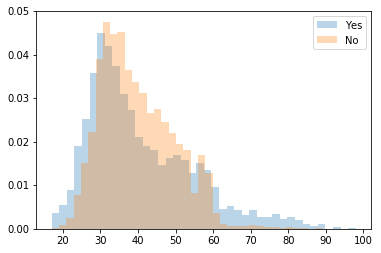

In [7]:
import matplotlib.pyplot as plt

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)
plt.hist(data[data['y']=='yes']['age'],label = "Yes", **kwargs)
plt.hist(data[data['y']=='no']['age'],label = "No", **kwargs)
plt.legend()
plt.show()

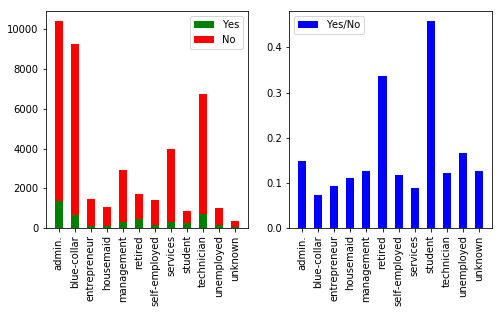

In [8]:
#职业
job = data[data['y']=='yes'].groupby('job').count()['y'].index
job_count_yes = data[data['y']=='yes'].groupby('job').count()['y']
job_count_no = data[data['y']=='no'].groupby('job').count()['y']

width = 0.5
plt.figure(figsize=(8, 4)) 
plt.subplot(121)
plt.bar(job,job_count_yes, width, color='green', label='Yes')
plt.bar(job,job_count_no, width, bottom = job_count_yes, color='red', label='No')
plt.xticks(rotation=90)
plt.legend()
plt.subplot(122)
plt.bar(job,job_count_yes/job_count_no, width, color='blue', label='Yes/No')
plt.xticks(rotation=90)
plt.legend()
plt.show()

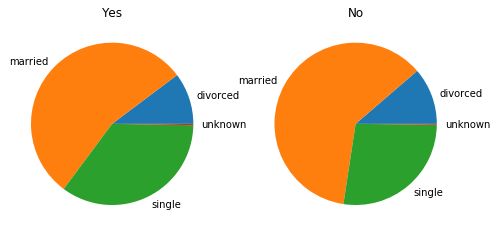

In [9]:
#婚姻状况
marital = data[data['y']=='yes'].groupby('marital').count()['y'].index
marital_count_yes = data[data['y']=='yes'].groupby('marital').count()['y']
marital_count_no = data[data['y']=='no'].groupby('marital').count()['y']
plt.figure(figsize=(8, 4)) 
plt.subplot(121)
plt.title('Yes')
plt.pie(marital_count_yes.values,labels = marital)
plt.subplot(122)
plt.title('No')
plt.pie(marital_count_no.values,labels = marital)
plt.show()

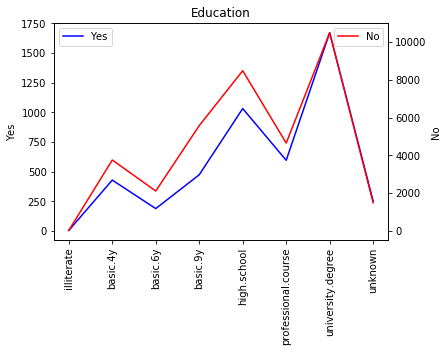

In [11]:
import numpy as np
#受教育程度
edu =  ["illiterate", "basic.4y", "basic.6y", "basic.9y", "high.school",  "professional.course", "university.degree","unknown"]
education_count_yes = data[data['y']=='yes'].groupby('education').count()['y']
education_count_no = data[data['y']=='no'].groupby('education').count()['y']
#按照学历对数据行重新排序
education_count_yes = education_count_yes.reindex(index=edu)
education_count_no = education_count_no.reindex(index=edu)
y = education_count_yes
n = education_count_no
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.xticks(rotation=90)
ax1.plot(y.values,'b',label = "Yes")
ax1.set_xticks(np.arange(len(edu)))
ax1.set_xticklabels(edu)
ax1.set_ylabel('Yes')
ax1.set_title("Education")
plt.legend()
ax2 = ax1.twinx()  # this is the important function
ax2.plot(n.values, 'r',label = "No")
ax2.set_xticks(np.arange(len(edu)))
ax2.set_xticklabels(edu)
ax2.set_ylabel('No')
plt.legend()
plt.show()

In [9]:
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn import preprocessing

可以认为变量default 、housing 和loan 为二分类变量，对其进行0，1编码。

In [10]:
#二分类encode
def encode_bin_attrs(data, bin_attrs):    
    for i in bin_attrs:
        data.loc[data[i] == 'no', i] = 0
        data.loc[data[i] == 'yes', i] = 1
    return data

可以认为变量education是有序分类变量，影响大小排序为"illiterate", "basic.4y", "basic.6y", "basic.9y", "high.school", "professional.course", "university.degree", 变量影响由小到大的顺序编码为1、2、3、...。

In [11]:
#有序变量encode
def encode_edu_attrs(data):
    values = ["illiterate", "basic.4y", "basic.6y", "basic.9y", 
    "high.school",  "professional.course", "university.degree"]
    levels = range(1,len(values)+1)
    dict_levels = dict(zip(values, levels))
    for v in values:
        data.loc[data['education'] == v, 'education'] = dict_levels[v]
    return data

可以认为变量job，marital，contact，month，day_of_week为无序分类变量。需要说明的是，虽然变量month和day_of_week从时间角度是有序的，但是对于目标变量而言是无序的。对于无序分类变量，可以利用哑变量（dummy variables）进行编码。一般的，n个分类需要设置n-1个哑变量。例如，变量marital分为divorced、married、single，使用两个哑变量V1和V2来编码。

In [12]:
#无序变量encode
def encode_cate_attrs(data, cate_attrs):
    data = encode_edu_attrs(data)
    cate_attrs.remove('education')
    for i in cate_attrs:
        dummies_df = pd.get_dummies(data[i])
        dummies_df = dummies_df.rename(columns=lambda x: i+'_'+str(x))
        data = pd.concat([data,dummies_df],axis=1)
        data = data.drop(i, axis=1)
    return data

将连续型特征离散化的一个好处是可以有效地克服数据中隐藏的缺陷： 使模型结果更加稳定。例如，数据中的极端值是影响模型效果的一个重要因素。极端值导致模型参数过高或过低，或导致模型被虚假现象"迷惑"，把原来不存在的关系作为重要模式来学习。而离散化，尤其是等距离散，可以有效地减弱极端值和异常值的影响。
连续型特征离散化、数据的规范化操作如下：

In [58]:
def feature_scaling(data, numeric_attrs):
    for i in numeric_attrs:
        std = data[i].std()
        if std != 0:
            data[i] = (data[i]-data[i].mean()) / std
        else:
            data = data.drop(i, axis=1)
    return data
    
def trans_num_attrs(data, numeric_attrs):
    bining_num = 10
    bining_attr = 'age'
    #离散化连续数据，它使用分位数对数据进行划分（分箱: bining），可以得到大小基本相等的箱子(bin)，以区间形式表示。
    #factorize()函数将区间转为数值。
    data[bining_attr] = pd.qcut(data[bining_attr], bining_num)
    data[bining_attr] = pd.factorize(data[bining_attr])[0]+1
    
    #数据标准化
    for i in numeric_attrs: 
        scaler = preprocessing.StandardScaler()
        data[i] = scaler.fit_transform(data[i].values.reshape(-1,1))     #####reshape 规定为一列
    return data

使用随机森林预测缺失值的方法实现如下：

In [59]:
def train_predict_unknown(trainX, trainY, testX):
    forest = RandomForestClassifier(n_estimators=100)
    forest = forest.fit(trainX, trainY.astype('int'))
    test_predictY = forest.predict(testX).astype(int)
    return pd.DataFrame(test_predictY, index=testX.index)

处理缺失值

In [45]:
def fill_unknown(data, bin_attrs, cate_attrs, numeric_attrs):
    # 结果：fill_attrs = ['education', 'default', 'housing', 'loan']
    fill_attrs = []
    for i in bin_attrs+cate_attrs:
        if data[data[i] == 'unknown']['y'].count() < 500:
            # delete col containing unknown
            data = data[data[i] != 'unknown'] 
        else:
            fill_attrs.append(i)
    print(fill_attrs)
    
    #分别处理二值、离散、连续的数据
    data = encode_cate_attrs(data, cate_attrs)
    data = encode_bin_attrs(data, bin_attrs)
    data = trans_num_attrs(data, numeric_attrs)
    data['y'] = data['y'].map({'no': 0, 'yes': 1}).astype(int)
    
    for i in fill_attrs:     
        test_data = data[data[i] == 'unknown']
        #print(test_data['default'])
        testX = test_data.drop(fill_attrs, axis=1) #删除unknown列
        
        train_data = data[data[i] != 'unknown']        
        trainY = train_data[i]
        trainX = train_data.drop(fill_attrs, axis=1)    
        #print(trainX)
        
        test_data[i] = train_predict_unknown(trainX, trainY, testX)
        data = pd.concat([train_data, test_data])
    
    return data

In [46]:
def preprocess_data():
    input_data_path = '~/Desktop/homework/bank-additional/bank-additional-full.csv'
    processed_data_path = '~/Desktop/homework/bank-additional/processed_data/bank-additional-full.csv'
    print("Loading data...")
    data = pd.read_csv(input_data_path, sep=';')
    print("Preprocessing data...")
    numeric_attrs = ['age', 'duration', 'campaign', 'pdays', 'previous',
                     'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                     'euribor3m', 'nr.employed']
    
    bin_attrs = ['default', 'housing', 'loan']
    cate_attrs = ['poutcome', 'education', 'job', 'marital', 
                  'contact', 'month','day_of_week']
    
    data = shuffle(data)
    data = fill_unknown(data, bin_attrs, cate_attrs, numeric_attrs)
    data.to_csv(processed_data_path, index=False)

In [47]:
start_time = datetime.now()
preprocess_data()
end_time = datetime.now()
delta_seconds = (end_time - start_time).seconds
print("Cost time: {}s".format(delta_seconds))

Loading data...
Preprocessing data...
['default', 'housing', 'loan', 'education']


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

Cost time: 22s


需要注意的是，由于原始数据是有序的（以时间为序），读取原始数据后，需要将其随机打乱，变成无序数据集。这里使用sklearn.utils包中的shuffle()函数进行打乱。

一些情况下原始数据维度非常高，维度越高，数据在每个特征维度上的分布就越稀疏，这对机器学习算法基本都是灾难性（维度灾难）。当我们又没有办法挑选出有效的特征时，需要使用PCA等算法来降低数据维度，使得数据可以用于统计学习的算法。但是，如果能够挑选出少而精的特征了，那么PCA等降维算法没有很大必要。在本次实验中，数据集中的特征已经比较有代表性而且并不过多，所以应该不需要降维（实验证明降维确实没有帮助）。

+ 到现在为止，已经完成数据预处理与特征工程部分,处理好的数据存储在../processed_data目录下，接下来进行模型的训练与评估

划分数据集步骤。 
首先，需要将处理好的数据集划分为3部分，分别是训练集（train set）、交叉检验集（Cross validation set）和测试集（test set）。（另见博客学习模型的评估和选择）。训练集是用于训练模型。交叉检验集用来进行模型的选择，包括选择不同的模型或者同一模型的不同参数，即选择在交叉检验集上的测试结果最优的模型。测试集用于检测最终选择的最优模型的质量。通常，可以按照6:2:2的比例划分

In [75]:
def split_data(data):
    data_len = data['y'].count()
    split1 = int(data_len*0.6)
    split2 = int(data_len*0.8)
    train_data = data[:split1]
    cv_data = data[split1:split2]
    test_data = data[split2:]
    
    return train_data, cv_data, test_data

对导入的数据集按如下方式进行简单统计可以发现，正样本（y=1）的数量远小于负样本（y=0）的数量，近似等于负样本数量的1/8。

在分类模型中，这种数据不平衡问题会使得学习模型倾向于把样本分为多数类，但是，我们常常更关心少数类的预测情况。在本次分类问题中，分类目标是预测客户是(yes：1)否(no：0)认购定期存款（变量y）。显然，我们更关心有哪些客户认购定期存款。为减弱数据不均衡问题带来的不利影响，在数据层面有两种较简单的方法：过抽样和欠抽样。

过抽样： 抽样处理不平衡数据的最常用方法，基本思想就是通过改变训练数据的分布来消除或减小数据的不平衡。过抽样方法通过增加少数类样本来提高少数类的分类性能 ，最简单的办法是简单复制少数类样本，缺点是可能导致过拟合，没有给少数类增加任何新的信息，泛化能力弱。改进的过抽样方法通过在少数类中加入随机高斯噪声或产生新的合成样本等方法。

欠抽样： 欠抽样方法通过减少多数类样本来提高少数类的分类性能，最简单的方法是通过随机地去掉一些多数类样本来减小多数类的规模，缺点是会丢失多数类的一些重要信息，不能够充分利用已有的信息。 

在本次实验中，采用Smote算法增加新的样本进行过抽样；采用随机地去掉一些多数类样本的方法进行欠抽样。Smote算法的基本思想是对于少数类中每一个样本x，以欧氏距离为标准计算它到少数类样本集中所有样本的距离，得到其k近邻。然后根据样本不平衡比例设置一个采样比例以确定采样倍率N，对于每一个少数类样本x，从其k近邻中随机选择若干个样本，构建新的样本。针对本实验的数据，为防止新生成的数据噪声过大，新的样本只有数值型变量真正是新生成的，其他变量和原样本一致。本次实验，采用了开源项目中的重采样的代码如下：

In [76]:
import random
from sklearn.neighbors import NearestNeighbors
import numpy as np

class Smote:
    def __init__(self,samples,N=10,k=3):
        self.n_samples,self.n_attrs=samples.shape
        self.N=N
        self.k=k
        self.samples=samples
        self.newindex=0
       # self.synthetic=np.zeros((self.n_samples*N,self.n_attrs))

    def over_sampling(self):
        N=int(self.N/1)
        self.synthetic = np.zeros((self.n_samples * N, self.n_attrs))
        neighbors=NearestNeighbors(n_neighbors=self.k).fit(self.samples)
        for i in range(len(self.samples)):
            nnarray=neighbors.kneighbors(self.samples[i].reshape(1,-1),return_distance=False)[0]
            #print nnarray
            self._populate(N,i,nnarray)
        return self.synthetic


    # for each minority class samples,choose N of the k nearest neighbors and generate N synthetic samples.
    def _populate(self,N,i,nnarray):
        for j in range(N):
            nn=random.randint(0,self.k-1)
            dif=self.samples[nnarray[nn]]-self.samples[i]
            gap=random.random()
            self.synthetic[self.newindex]=self.samples[i]+gap*dif
            self.newindex+=1

In [77]:
def resample_train_data(train_data, n, frac):
    numeric_attrs = ['age', 'duration', 'campaign', 'pdays', 'previous',
                 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                 'euribor3m', 'nr.employed',]
    #numeric_attrs = train_data.drop('y',axis=1).columns
    pos_train_data_original = train_data[train_data['y'] == 1]
    pos_train_data = train_data[train_data['y'] == 1]
    new_count = n * pos_train_data['y'].count()
    neg_train_data = train_data[train_data['y'] == 0].sample(frac=frac)
    train_list = []
    if n != 0:
        pos_train_X = pos_train_data[numeric_attrs]
        pos_train_X2 = pd.concat([pos_train_data.drop(numeric_attrs, axis=1)] * n)
        pos_train_X2.index = range(new_count)
        
        s = Smote(pos_train_X.values, N=n, k=3)
        pos_train_X = s.over_sampling()
        pos_train_X = pd.DataFrame(pos_train_X, columns=numeric_attrs, 
                                   index=range(new_count))
        pos_train_data = pd.concat([pos_train_X, pos_train_X2], axis=1)
        pos_train_data = pd.DataFrame(pos_train_data, columns=pos_train_data_original.columns)
        train_list = [pos_train_data, neg_train_data, pos_train_data_original]
    else:
        train_list = [neg_train_data, pos_train_data_original]
    print("Size of positive train data: {} * {}".format(pos_train_data_original['y'].count(), n+1))
    print("Size of negative train data: {} * {}".format(neg_train_data['y'].count(), frac))
    train_data = pd.concat(train_list, axis=0)
    return shuffle(train_data)

常用的分类模型包括感知机，SVM，朴素贝叶斯，决策树，logistic回归，随机森林等等。

对于不同的任务，评价一个模型的优劣可能不同。由于本次作业选取的数据集是不平衡的，数据集中负样本0值占数据集总比例88.7%，如果我们的模型"预测"所有的目标变量值都为0，那么准确度(Accuracy)应该在88.7%左右。显然，这是没有意义的。所以，我们更倾向于能够预测出正样本（y=1）的模型。因此，实验中将正样本的f1-score作为评价模型优劣的标准(也可以用其他类似的评价指标如AUC)。训练与评估的代码如下：

In [78]:
def train_evaluate(train_data, test_data, classifier, n=1, frac=1.0, threshold = 0.5):  
    train_data = resample_train_data(train_data, n, frac)
    train_X = train_data.drop('y',axis=1)
    train_y = train_data['y']
    test_X = test_data.drop('y', axis=1)
    test_y = test_data['y']
    
    classifier = classifier.fit(train_X, train_y)
    prodict_prob_y = classifier.predict_proba(test_X)[:,1]
    report = classification_report(test_y, prodict_prob_y > threshold,
                                   target_names = ['no', 'yes'])
    prodict_y = (prodict_prob_y > threshold).astype(int)
    accuracy = np.mean(test_y.values == prodict_y)
    print("Accuracy: {}".format(accuracy))    
    print(report)
    fpr, tpr, thresholds = metrics.roc_curve(test_y, prodict_prob_y)
    precision, recall, thresholds = metrics.precision_recall_curve(test_y, prodict_prob_y)  
    test_auc = metrics.auc(fpr, tpr)
    plot_pr(test_auc, precision, recall, "yes")
    
    return prodict_y

In [83]:
from datetime import datetime

import pandas as pd
import numpy as np
from matplotlib import pylab
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [84]:
def evaluate(test_predictY, test_y):
    test_len = test_y.shape[0]
    true_pos = 0
    false_pos = 0
    true_neg = 0
    false_neg = 0
    for i in range(test_len):
        if test_predictY[i] == 1:
            if test_y[i] == 1:
                true_pos += 1
            else:
                false_pos += 1
        else:
            if test_y[i] == 0:
                true_neg += 1
            else:
                false_neg += 1
    
    accuracy = 1.0 * (true_pos+true_neg) / test_len
    precision  = 1.0 * true_pos / (true_pos + false_pos)
    recall = 1.0 * true_pos / (true_pos + false_neg)
    f1Score = 2 * precision * recall / (precision + recall)
    print("Accuracy: {}".format(accuracy))
    print("Precision: {}".format(precision ))
    print("Recall: {}".format(recall))
    print("F1 Score: {}".format(f1Score))


def plot_pr(auc_score, precision, recall, label=None):  
    pylab.figure(num=None, figsize=(6, 5))  
    pylab.xlim([0.0, 1.0])  
    pylab.ylim([0.0, 1.0])
    pylab.xlabel('Recall')  
    pylab.ylabel('Precision')  
    pylab.title('P/R (AUC=%0.2f) / %s' % (auc_score, label))  
    pylab.fill_between(recall, precision, alpha=0.2)  
    pylab.grid(True, linestyle='-', color='0.75')  
    pylab.plot(recall, precision, lw=1)      
    pylab.show()
    


def plot_roc(auc_score, fpr, tpr, label=None):  
    pylab.figure(num=None, figsize=(6, 5))  
    pylab.xlim([0.0, 1.0])  
    pylab.ylim([0.0, 1.0])
    pylab.xlabel('False positive rate')  
    pylab.ylabel('True positive rate')  
    pylab.title('ROC (AUC=%0.2f) / %s' % (auc_score, label))  
    pylab.fill_between(fpr, tpr, alpha=0.2)  
    pylab.grid(True, linestyle='-', color='0.75')  
    pylab.plot(fpr, tpr, lw=1)      
    pylab.show()


def train_evaluate(train_data, test_data, classifier, n=1, frac=1.0, threshold = 0.5):  
    train_data = resample_train_data(train_data, n, frac)
    train_X = train_data.drop('y',axis=1)
    train_y = train_data['y']
    test_X = test_data.drop('y', axis=1)
    test_y = test_data['y']
    
    classifier = classifier.fit(train_X, train_y)
    prodict_prob_y = classifier.predict_proba(test_X)[:,1]
    report = classification_report(test_y, prodict_prob_y > threshold,
                                   target_names = ['no', 'yes'])
    prodict_y = (prodict_prob_y > threshold).astype(int)
    accuracy = np.mean(test_y.values == prodict_y)
    print("Accuracy: {}".format(accuracy))    
    print(report)
    fpr, tpr, thresholds = metrics.roc_curve(test_y, prodict_prob_y)
    precision, recall, thresholds = metrics.precision_recall_curve(test_y, prodict_prob_y)  
    test_auc = metrics.auc(fpr, tpr)
    plot_pr(test_auc, precision, recall, "yes")
    
    return prodict_y


#用不同的分类模型进行测试
def select_model(model ,train_data, cv_data):    
    for name in model:
        if name == 'svm':
            clf = SVC(kernel='rbf', probability=True)
            train_evaluate(train_data, cv_data, clf, n=7, frac=1.0, threshold=0.4)
        elif name == 'randomforest':
            forest = RandomForestClassifier(n_estimators=400, oob_score=True)
            train_evaluate(train_data, cv_data, forest, n=7, frac=1.0, threshold=0.4)
        elif name == 'logisticregression':
            lr = LogisticRegression(max_iter=100, C=1, random_state=0)
            train_evaluate(train_data, cv_data, lr, n=7, frac=1.0, threshold=0.4)
            
            
    
#确定关键特征
def find_key_attrs(forest):
    feature_importance = forest.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    fi_threshold = 5
    important_idx = np.where(feature_importance > fi_threshold)[0]
    important_features = features_list[important_idx]
    print("\n", important_features.shape[0], "Important features(>", \
          fi_threshold, "% of max importance)...\n")#, \
    
    #important_features
    sorted_idx = np.argsort(feature_importance[important_idx])[::-1]
    #get the figure about important features
    pos = np.arange(sorted_idx.shape[0]) + .5
    #plt.subplot(1, 2, 2)
    plt.title('Feature Importance')
    plt.barh(pos, feature_importance[important_idx][sorted_idx[::-1]], \
            color='r',align='center')
    plt.yticks(pos, important_features[sorted_idx[::-1]])
    plt.xlabel('Relative Importance')
    plt.draw()
    plt.show()

Size of positive train data: 3088 * 8
Size of negative train data: 21384 * 1.0


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.881696702218953
              precision    recall  f1-score   support

          no       0.98      0.89      0.93      7268
         yes       0.48      0.82      0.60       889

    accuracy                           0.88      8157
   macro avg       0.73      0.86      0.77      8157
weighted avg       0.92      0.88      0.89      8157



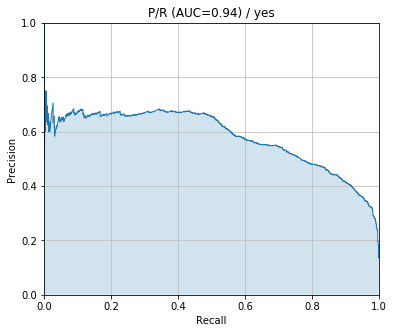

Size of positive train data: 3088 * 8
Size of negative train data: 21384 * 1.0
Accuracy: 0.9006987863184994
              precision    recall  f1-score   support

          no       0.97      0.92      0.94      7268
         yes       0.53      0.76      0.63       889

    accuracy                           0.90      8157
   macro avg       0.75      0.84      0.78      8157
weighted avg       0.92      0.90      0.91      8157



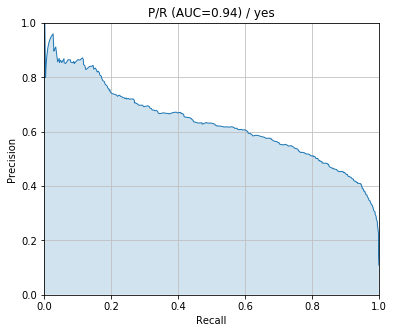

Size of positive train data: 3088 * 8
Size of negative train data: 21384 * 1.0


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.8419762167463528
              precision    recall  f1-score   support

          no       0.99      0.83      0.90      7268
         yes       0.40      0.90      0.56       889

    accuracy                           0.84      8157
   macro avg       0.69      0.87      0.73      8157
weighted avg       0.92      0.84      0.87      8157



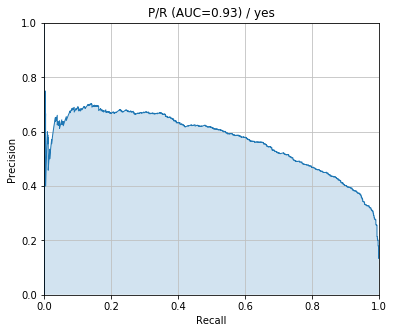

Training...
Size of positive train data: 3088 * 8
Size of negative train data: 21384 * 1
Accuracy: 0.9275557734738906
              precision    recall  f1-score   support

          no       0.98      0.94      0.96      7541
         yes       0.51      0.74      0.61       617

    accuracy                           0.93      8158
   macro avg       0.75      0.84      0.78      8158
weighted avg       0.94      0.93      0.93      8158



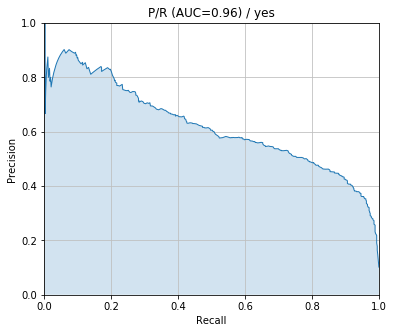


 17 Important features(> 5 % of max importance)...



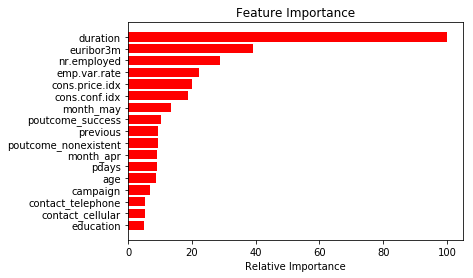

Cost time: 29s


In [85]:
processed_data = './bank-additional/processed_data/bank-additional-full.csv'
data = pd.read_csv(processed_data)
train_data, cv_data, test_data = split_data(data)

features_list = train_data.drop('y',axis=1).columns
select_model(['svm', 'randomforest', 'logisticregression'], train_data, cv_data)
start_time = datetime.now()

print('Training...')
forest = RandomForestClassifier(n_estimators=400, oob_score=True)
prodict_y = train_evaluate(train_data, test_data, forest, n=7, frac=1, threshold=0.40)
find_key_attrs(forest) #寻找关键特征

end_time = datetime.now()
delta_seconds = (end_time - start_time).seconds

print("Cost time: {}s".format(delta_seconds))